## УРАВНЕНИЕ ПЕРЕНОСА

В физике под термином перенос понимают необратимые процессы, в результате которых в физической системе происходит пространственное перемещение (перенос) массы, импульса, энергии, заряда или какой-либо другой физической величины.
Линейное одномерное уравнение переноса (или уравнение адвекции) – простейшее дифференциальное уравнение в частных производных – записывается в виде

$$
\frac{\partial U(x,t)}{\partial t}+c\frac{\partial U(x,t)}{\partial x}=\Phi(U,x,t)
$$
Для численного решения уравнения переноса можно использовать явную разностную схему:

$$
\frac{\hat{U}_i-U_i}{\tau}+c\frac{U_i-U_{i-1}}{\Delta}=\frac{\Phi_{i-1}+\Phi_i}{2}
$$

где $\hat{U}$ - значение сеточной функции на верхнем временном слое. Эта схема устойчива при числе Куранта $K=c\tau/\Delta<1$

### Нелинейный перенос

$$
\frac{\partial U(x,t)}{\partial t}+(C_0+UC_1)\frac{\partial U(x,t)}{\partial x}=\Phi(U,x,t)
$$

Линейный источник (перенос с поглощением): $\Phi(U,x,t)=-BU$

$$
U^{j+1}_i=\left(1-\frac{h_tB}{2}-\frac{h_tC_0}{h_x}-\frac{h_tC_1}{h_x}U^j_i\right)U^j_i+U^j_{i-1}\left(\frac{h_tC_0}{h_x}-\frac{h_tB}{2}+\frac{h_tC_1}{h_x}U^j_i\right)
$$

In [2]:
using Plots
pyplot()

Plots.PyPlotBackend()

In [4]:
a = 0.2
b = 0.01
ust = x -> x^2 * exp( -(x-a)^2/b ) # начальное условие
bord = t -> 0. # граничное

#10 (generic function with 1 method)

Kurant: 0.8 0.2

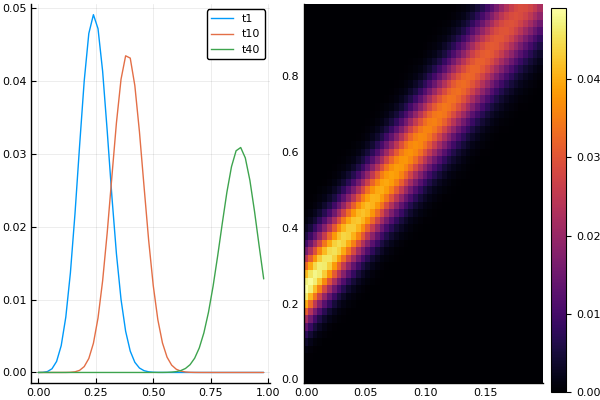

In [5]:
 # можно задавать значения по-умолчанию
function transferequi(;C0 = 1., C1 = 0., B = 0., Nx = 50, Nt = 50, tlmt = 0.01)
    dx = 1/Nx
    dt = tlmt/Nt
    
    b0 = 0.5B*dt
    c0 = C0*dt/dx
    c1 = C1*dt/dx
    
    print("Kurant: $c0 $c1")
    
    x = [i for i in range(0, length = Nx, step = dx)]# один из способов задать массив с помощью цикла
    t = [i for i in range(0, length = Nt, step = dt)] # ранжированая переменная - не массив
    
    U = zeros(Nx, Nt)
    
    U[:,1] = ust.(x)
    U[1,:] = bord.(t)
    
    for j = 1:Nt-1, i = 2:Nx
        U[i, j+1] = ( 1-b0-c0-c1*U[i,j] )*U[i,j] + ( c0-b0+c1*U[i,j] )*U[i-1,j]
    end

    t, x, U
end

t, X, Ans0 = transferequi( C0 = 4., C1 = 1., B = 1.5, tlmt = 0.2 )

plot(X, Ans0[:,1], lab = "t1")
plot!(X, Ans0[:,10], lab = "t10")
p = plot!(X, Ans0[:,40], lab = "t40")
plot( p, heatmap(t, X, Ans0) ) 

Kurant: 0.4

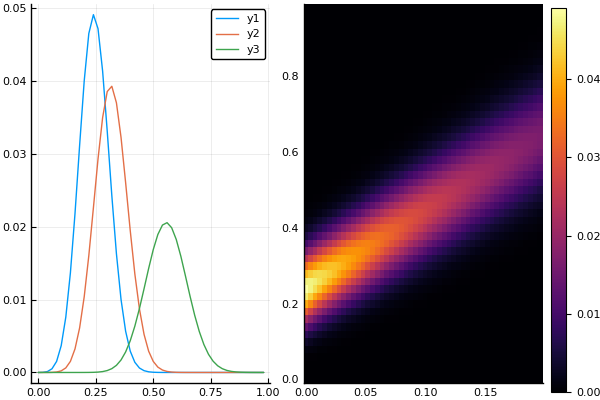

In [4]:
t, X, Ans0 = transferequi( C0 = 2., C1 = 1., B = 3.5, tlmt = 0.2 )

plot(X, Ans0[:,1])
plot!(X, Ans0[:,10])
p = plot!(X, Ans0[:,40])
plot( p, heatmap(t, X, Ans0) )

Kurant: 0.4 6.0

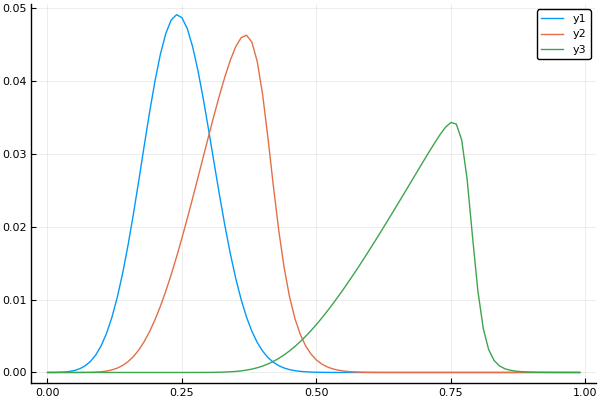

In [11]:
t, X, Ans0 = transferequi( C0 = 1., C1 = 15., B = 0.1, Nx = 100, Nt = 100,  tlmt = 0.4 )

plot(X, Ans0[:,1])
plot!(X, Ans0[:,20])
plot!(X, Ans0[:,90])


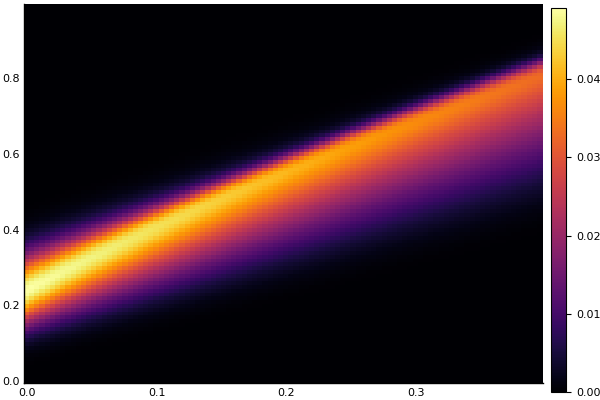

In [8]:
heatmap(t, X, Ans0)

### Уравнение Бюргерса

Усложним уравнение переноса, добавив в него диффузионное слагаемое:
$$
\frac{\partial U(x,t)}{\partial t}+C(U)\frac{\partial U(x,t)}{\partial x}=D\frac{\partial^2 U(x,t)}{\partial x^2}
$$

Это уравнение при $c(u)=u$ называют уравнением Бюргерса. Явная разностная схема выглядит следующим образом:

$$
U^{j+1}_i=\left(1+\frac{2Dh_t}{h^2_x}-\frac{h_t}{h_x}U^j_i\right)U^j_i+\left(\frac{Dh_t}{h^2_x}+\frac{h_t}{h_x}U^j_i\right)U^j_{i-1}+\frac{Dh_t}{h^2_x}U^j_{i+1}
$$

Kurant: 0.7999999999999999 0.7999999999999999 ) dx = 0.0125 dt = 0.001

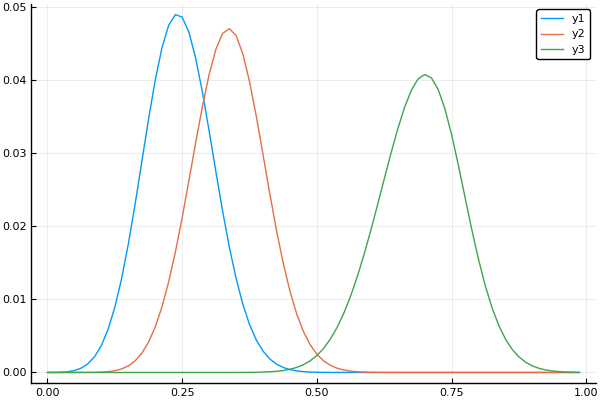

In [32]:
function burgers(;D = 0., C0 = 1., C1 = 0., Nx = 80, Nt = 50, tlmt = 0.001)
    dx = 1/Nx
    dt = tlmt/Nt
    d0 = D*dt/(dx*dx)
    c0 = C0*dt/dx
    c1 = C1*dt/dx
    
    print("Kurant: $c0 $c1 dx = $dx dt = $dt")
    
    x = [i for i in range(0, length = Nx, step = dx)]
    t = [i for i in range(0, length = Nt, step = dt)]
    U = zeros(Nx, Nt)
    
    U[:,1] = ust.(x)
    U[1,:] = bord.(t)
    
    for j = 1:Nt-1, i = 2:Nx-1
        U[i, j+1] = ( 1 - 2d0 - c0 - c1*U[i,j] )*U[i,j] + ( c0 + d0 + c1*U[i,j] )*U[i-1,j] + d0*U[i+1,j]
    end
    x, U
end

X, Ans1 = burgers( D = 0.01, C0 = 10., C1 = 10., tlmt = 0.05 )

plot(X, Ans1[:,1])
plot!(X, Ans1[:,10])
plot!(X, Ans1[:,45])

Kurant: 0.32 1.5999999999999999 ) dx = 0.0125 dt = 0.002

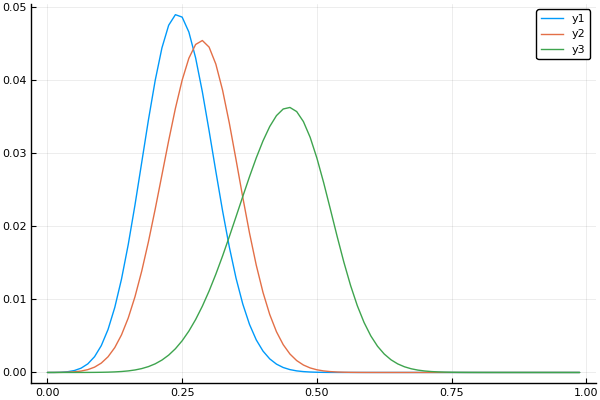

In [37]:
X, Ans1 = burgers( D = 0.01, C0 = 2., C1 = 10., tlmt = 0.1 )

plot(X, Ans1[:,1])
plot!(X, Ans1[:,10])
plot!(X, Ans1[:,45])

Kurant: 0.7999999999999999 dx = 0.0125 dt = 0.001

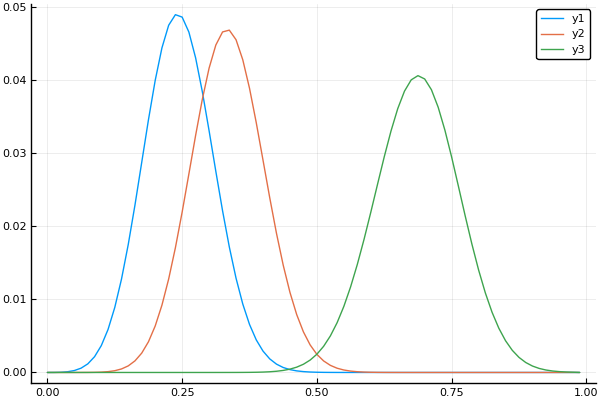

In [9]:
X, Ans1 = burgers( D = 0.01, C0 = 10., C1 = 2., tlmt = 0.05 )

plot(X, Ans1[:,1])
plot!(X, Ans1[:,10])
plot!(X, Ans1[:,45])

Kurant: 0.16 dx = 0.0125 dt = 0.0002

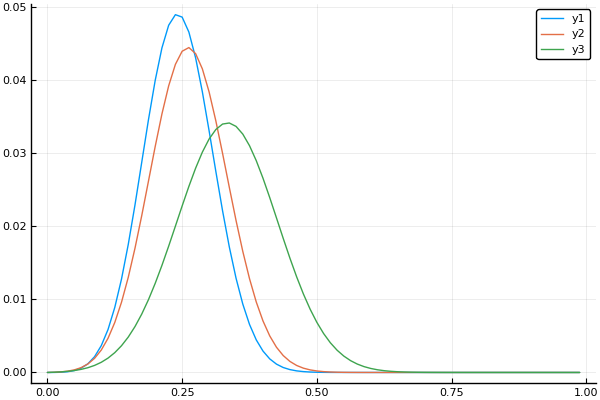

In [19]:
X, Ans1 = burgers( D = 0.2, C0 = 10., C1 = 10., tlmt = 0.01 )

plot(X, Ans1[:,1])
plot!(X, Ans1[:,10])
plot!(X, Ans1[:,45])

## УРАВНЕНИЕ ТЕПЛОПРОВОДНОСТИ

Дифференциальное уравнение теплопроводности (или уравнение диффузии  тепла) записывается следующим образом:

$$
\frac{\partial T(x,t)}{\partial t}+D\frac{\partial^2 U(x,t)}{\partial x^2}=\phi(T,x,t)
$$

Это уравнение *параболического* типа, содержащее первую производную по времени t и вторую по пространственной координате x. Оно описывает динамику температуры   например, остывающего или нагреваемого металлического стержня (функция T описывает профиль температуры по координате х вдоль стержня). Коэффициент D называется коэффициентом теплопроводности (диффузии). Он может быть как постоянным, так и зависеть, как явно от координат, так и от самой искомой функции D(t, x,T). 

Рассмотрим линейное уравнение(Коэффициент диффузии и источники тепла не зависят от температуры). Разностная аппроксимация дифференциального уравнения

$$
\frac{T_{i,n+1}-T_{i,n}}{\tau}=D\frac{T_{i-1,n}-2T_{i,n}+T_{i+1,n}}{\Delta^2}+\phi_{i,n} \\
\frac{T_{i,n+1}-T_{i,n}}{\tau}=D\frac{T_{i-1,n+1}-2T_{i,n+1}+T_{i+1,n+1}}{\Delta^2}+\phi_{i,n}
$$

с помощью явной и неявной схемы Эйлера соответственно.

In [38]:
δ(x) = x==0 ? 0.5 : x>0 ? 1 : 0 # дельта-функция с использованием тернарного оператора
startcond = x-> δ(x-0.45) - δ(x-0.55) # начальное условие
bordrcond = x-> 0. # условие на границе
D(u) = 1 # коэффициент диффузии
Φ(u) = 0 # функция описывающая источники
# чтоб ввести греческую букву вводим LaTex команду и жмем Tab
# \delta press Tab -> δ

Φ (generic function with 1 method)

Kurant: 0.3125 dx = 0.02 dt = 0.000125 k<0.5? true

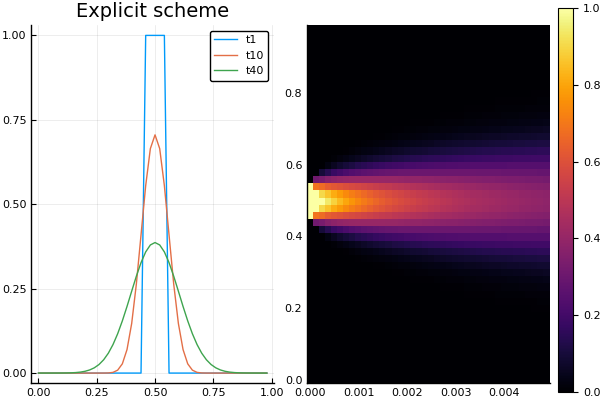

In [39]:
function linexplicit(Nx = 50, Nt = 40; tlmt = 0.01)
    dx = 1/Nx
    dt = tlmt/Nt
    k = dt/(dx*dx)
    
    print("Kurant: $k dx = $dx dt = $dt k<0.5? $(k<0.5)")
    
    x = [i for i in range(0, length = Nx, step = dx)] # один из способов задать массив с помощью цикла
    t = [i for i in range(0, length = Nt, step = dt)] # ранжированая переменная - не массив
    U = zeros(Nx, Nt)
    
    U[: ,1] = startcond.(x)
    U[1 ,:] = U[Nt,:] = bordrcond.(t)
    
    for j = 1:Nt-1, i = 2:Nx-1
        U[i, j+1] = U[i,j]*(1-2k*D( U[i,j] )) + k*U[i-1,j]*D( U[i-1,j] ) + k*U[i+1,j]*D( U[i+1,j] ) + dt*Φ(U[i,j])
    end
    t, x, U
end

t, X, Ans2 = linexplicit( tlmt = 0.005 )

plot(X, Ans2[:,1], lab = "t1")
plot!(X, Ans2[:,10], lab = "t10")
p = plot!(X, Ans2[:,40], lab = "t40", title = "Explicit scheme")
plot( p, heatmap(t, X, Ans2) )

In [106]:
function nonexplicit(Nx = 50, Nt = 40; tlmt = 0.01)
    dx = 1/Nx
    dt = tlmt/Nt
    k = dt/(dx*dx)
    
    print("Kurant: $k dx = $dx dt = $dt k<0.5? $(k<0.5)\n")
    
    x = [i for i in range(0, length = Nx, step = dx)]
    t = [i for i in range(0, length = Nt, step = dt)]
    U = zeros(Nx, Nt)
    η = zeros(Nx+1)
    ξ = zeros(Nx)
    
    U[: ,1] = startcond.(x)
    U[1 ,:] = bordrcond.(t)
    U[Nt,:] = bordrcond.(t)
    
    for j = 1:Nt-1
        b = -1 - 2k*D( U[1,j] )
        c = -k*D( U[2,j] )
        d = U[1,j] + dt*Φ(U[1,j])
        ξ[2] = c/b
        η[2] = -d/b

        for i = 2:Nx-1

            a = -k*D( U[i-1,j] )
            b = -2k*D( U[i,j] ) - 1
            c = -k*D( U[i+1,j] )
            d = U[i,j] + dt*Φ(U[i,j])

            ξ[i+1] = c / (b-a*ξ[i])
            η[i+1] = (a*η[i]-d) / (b-a*ξ[i])
        end
        
        U[Nx,j+1] = η[Nx]
        
        for i = Nx:-1:2
            U[i-1,j+1] = ξ[i]*U[i,j+1] + η[i]
        end
    end
    t, x, U
end

nonexplicit (generic function with 3 methods)

Kurant: 0.3125 dx = 0.02 dt = 0.000125 k<0.5? true

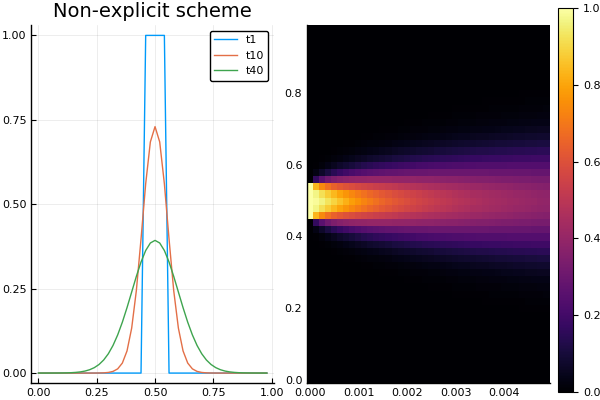

In [88]:
t, X, Ans3 = nonexplicit(tlmt = 0.005)
plot(X, Ans3[:,1], lab = "t1")
plot!(X, Ans3[:,10], lab = "t10")
p = plot!(X, Ans3[:,40], lab = "t40", title = "Non-explicit scheme")
plot( p, heatmap(t, X, Ans3) )

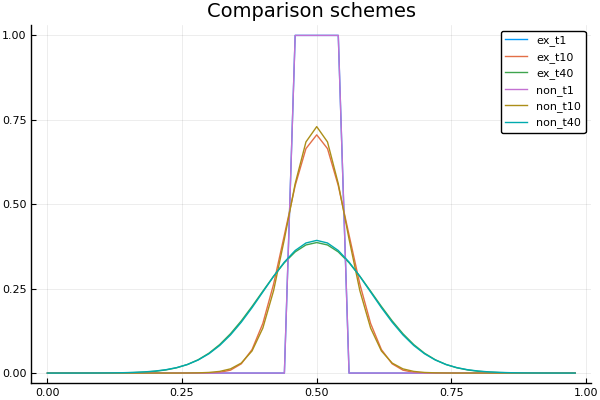

In [89]:
 plot(X, Ans2[:,1], lab = "ex_t1")
plot!(X, Ans2[:,10], lab = "ex_t10")
plot!(X, Ans2[:,40], lab = "ex_t40")
plot!(X, Ans3[:,1], lab = "non_t1")
plot!(X, Ans3[:,10], lab = "non_t10")
plot!(X, Ans3[:,40], lab = "non_t40", title = "Comparison schemes")

### Нелинейное уравнение теплопроводности

Намного более интересные решения можно получить для нелинейного уравнения теплопроводности, например, с нелинейным источником тепла $\phi(x,T)=10^3(T-T^3)$. Если задать его в таком виде, то получится решение в форме тепловых фронтов, распространяющихся в обе стороны от зоны первичного нагрева

Kurant: 0.3125 dx = 0.02 dt = 0.000125 k<0.5? true

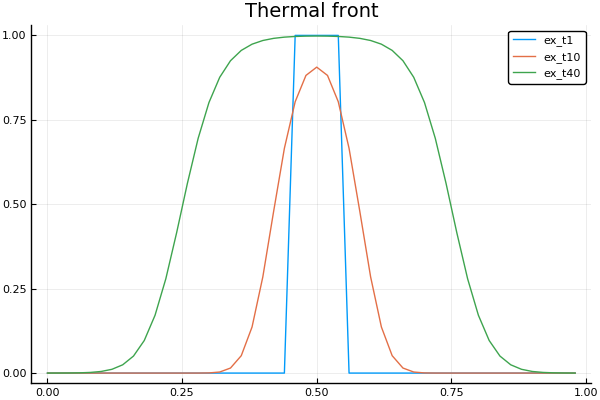

In [90]:
Φ(u) = 1e3*(u-u^3)

t, X, Ans4 = linexplicit( tlmt = 0.005 )

plot(X, Ans4[:,1], lab = "ex_t1")
plot!(X, Ans4[:,10], lab = "ex_t10")
plot!(X, Ans4[:,40], lab = "ex_t40", title = "Thermal front")

Еще более неожиданные решения возможны при нелинейности также и коэффициента диффузии. Например, если взять $D(x,T)=T^2$, a $\phi(x,T)=10^3T^{3.5}$, то можно наблюдать эффект горения среды, локализованный в области ее первичного нагрева (S-режим горения "с обострением").

Kurant: 0.03125 dx = 0.02 dt = 1.25e-5 k<0.5? trueKurant: 0.03125 dx = 0.02 dt = 1.25e-5 k<0.5? true

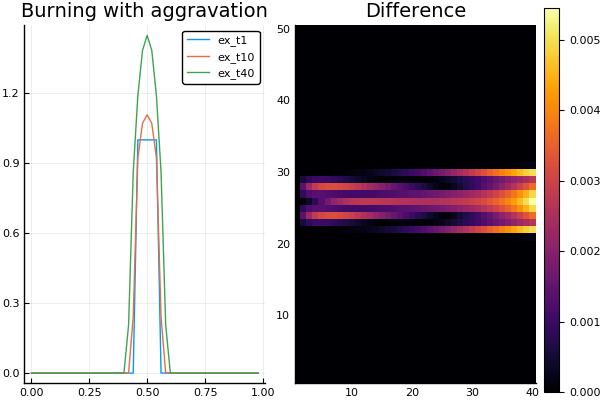

In [105]:
D(u) = u*u
Φ(u) = 1e3*abs(u)^(3.5)

t, X, Ans5 = linexplicit( tlmt = 0.0005 )
t, X, Ans6 = nonexplicit( tlmt = 0.0005 )

plot(X, Ans5[:,1], lab = "ex_t1")
plot!(X, Ans5[:,10], lab = "ex_t10")
p1 = plot!(X, Ans5[:,40], lab = "ex_t40", title = "Burning with aggravation")
p2 = heatmap(abs.(Ans6-Ans5), title = "Difference") 
plot(p1, p2)

## ВОЛНОВОЕ УРАВНЕНИЕ

Волновое уравнение гиперболического типа

$$
\frac{\partial^2 U(x,t)}{\partial t^2}=c^2\frac{\partial^2 U(x,t)}{\partial x^2}
$$

описывает одномерные линейные волны без дисперсии. Например, колебания струны, звук в жидкости (газе) или электромагнитные волны в вакууме (в последнем случае уравнение должно быть записано в векторном виде).

Простейшей разностной схемой, аппроксимирующей данное уравнение, является явная пятиточечная схема 

$$
\frac{U^{n+1}_i-2U^{n}_i+U^{n-1}_i}{\tau^2}=c^2\frac{U^n_{i+1}-2U^n_i+U^n_{i-1}}{h^2}\\
x_i=ih,\,t_n=\tau
$$

Эта схема, получившая название «крест», имеет второй порядок точности по времени и по пространственной координате и является трехслойной по времени.

In [79]:
# функция задающая начальное условие
ψ = x -> x^2 * exp( -(x-0.5)^2/0.01 )
# поведение на границах
ϕ(x) = 0
c = x -> 1

# решение одномерного волнового уравнения
function pdesolver(N = 100, K = 100, L = 2pi, T = 10, a = 0.1 )
    
    dx = L/N;
    dt = T/K;
    gam(x) = c(x)*c(x)*a*a*dt*dt/dx/dx;
    print("Kurant-Fridrihs-Levi: $(dt*a/dx) dx = $dx dt = $dt")
    u = zeros(N,K); # матрица в которой будет храниться информация о состоянии нити в каждый момент
    x = [i for i in range(0, length = N, step = dx)]
    # инициализируем первые два временных слоя
    u[:,1] = ψ.(x);
    u[:,2] = u[:,1] + dt*ψ.(x);
    # задаём поведение на границах
    
    fill!( u[1,:], 0);
    fill!( u[N,:], ϕ(L) );
    
    # теперь у нас массив размером N на K у которого расчетными значениями заполнены
    # две первые строки и первый и последний столбцы, оставшиеся элементы расчитываем
    # используя конечные разности
    for t = 2:K-1, i = 2:N-1
        u[i,t+1] = -u[i,t-1] + gam( x[i] )* (u[i-1,t] + u[i+1,t]) + (2-2*gam( x[i] ) )*u[i,t];
    end
    x, u
end

pdesolver (generic function with 6 methods)

Kurant-Fridrihs-Levi: 0.12500000000000003 dx = 0.02 dt = 0.025

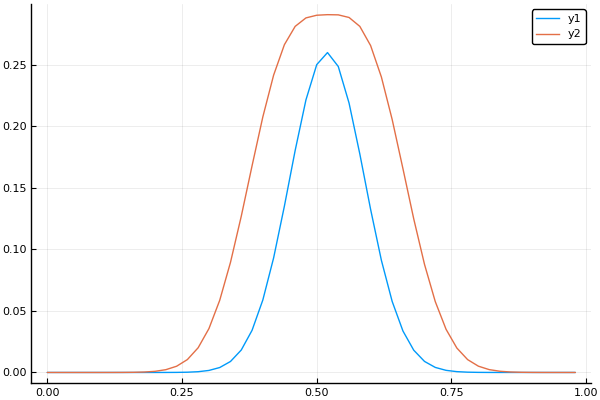

In [85]:
N = 50; # количество шагов по координате
K = 40; # и по времени
a = 0.1; # скорость распространения волны
L = 1; # длина образца 
T = 1; # длительность эксперимента

t = [i for i in range(0, length = K, stop = T)]

X, U = pdesolver(N, K, L, T, a) # вызываем расчетную функцию

plot(X, U[:,1])
plot!(X, U[:,40])

In [51]:
using PyPlot

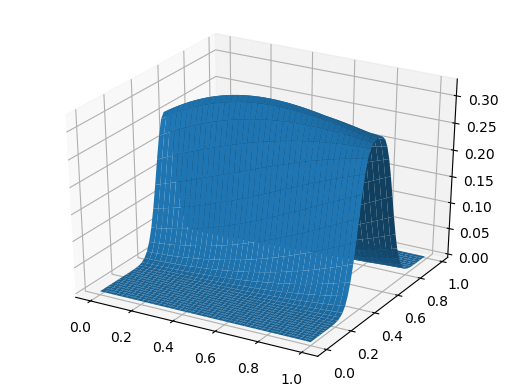

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x00000000397ECB38>

In [84]:
surf(t, X, U)

### Распространение волны со скоростью зависящей от координаты

Kurant-Fridrihs-Levi: 0.1875 dx = 0.02 dt = 0.00375

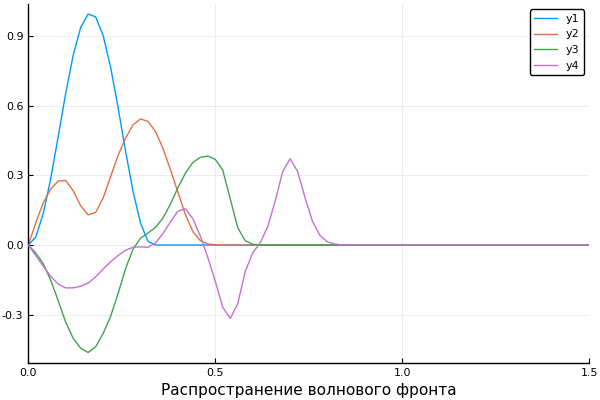

In [86]:
ψ = x -> x>1/3 ? 0 : sin(3pi*x)^2
c = x -> x>0.5 ? 0.5 : 1

X, U = pdesolver(400, 400, 8, 1.5, 1)
plot(X, U[:,1])
plot!(X, U[:,40])
plot!(X, U[:,90])
plot!(X, U[:,200], xaxis=("Распространение волнового фронта", (0, 1.5), 0:0.5:2) )

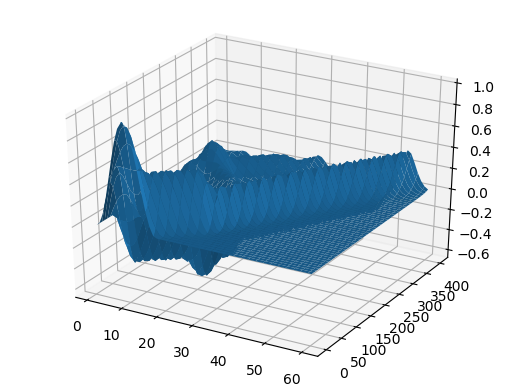

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x000000002CB83940>

In [99]:
U2 = [ U[i,j] for i = 1:60, j = 1:size(U,2) ]
surf(U2)

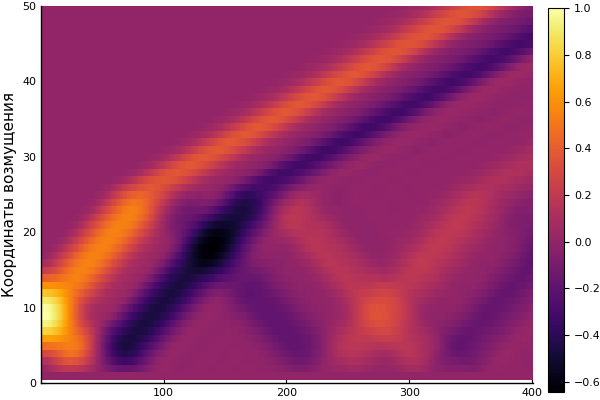

In [88]:
heatmap(U, yaxis=("Координаты возмущения", (0, 50), 0:10:50))